In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

In [2]:
data_dir = 'F:\datasets\Kaggle2\SubsetVMMR'

In [3]:
data_dir

'F:\\datasets\\Kaggle2\\SubsetVMMR'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('F:/datasets/Kaggle2/SubsetVMMR')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

5000

In [6]:
honda_civic = list(data_dir.glob('honda_civic/*'))
honda_civic[:5]

[WindowsPath('F:/datasets/Kaggle2/SubsetVMMR/honda_civic/00000_8tz5dxzg7te_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle2/SubsetVMMR/honda_civic/00000_exCv14ALbej_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle2/SubsetVMMR/honda_civic/00000_fs3NmSvN2Gt_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle2/SubsetVMMR/honda_civic/00000_hhD59J3W9de_600x450.jpg'),
 WindowsPath('F:/datasets/Kaggle2/SubsetVMMR/honda_civic/00000_imuHBy69cmH_600x450.jpg')]

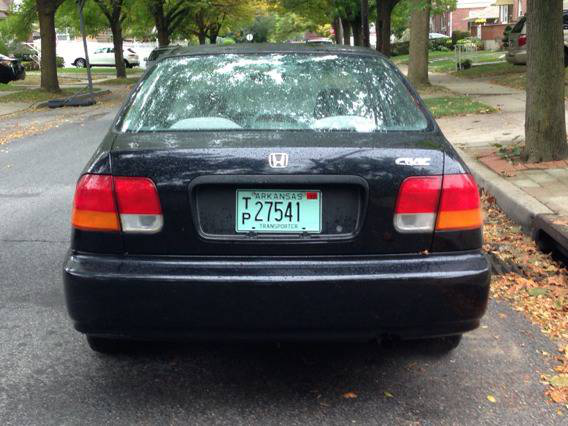

In [7]:
PIL.Image.open(str(honda_civic[67]))

In [8]:
cars_image_dic = {
    'chevrolet_impala': list(data_dir.glob('chevrolet_impala/*')),
    'chevrolet_silverado': list(data_dir.glob('chevrolet_silverado/*')),
    'dodge_ram_1500': list(data_dir.glob('dodge_ram_1500/*')),
    'ford_f150': list(data_dir.glob('ford_f150/*')),
    'gmc_sierra_1500': list(data_dir.glob('gmc_sierra_1500/*')),
    'honda_accord': list(data_dir.glob('honda_accord/*')),
    'honda_civic': list(data_dir.glob('honda_civic/*')),
    'nissan_altima': list(data_dir.glob('nissan_altima/*')),
    'toyota_camry': list(data_dir.glob('toyota_camry/*')),
    'toyota_corolla': list(data_dir.glob('toyota_corolla/*')),
}

In [9]:
cars_labels_dic = {
    'chevrolet_impala': 0,
    'chevrolet_silverado': 1,
    'dodge_ram_1500': 2,
    'ford_f150': 3,
    'gmc_sierra_1500': 4,
    'honda_accord': 5,
    'honda_civic': 6,
    'nissan_altima': 7,
    'toyota_camry': 8,
    'toyota_corolla': 9,
}

In [10]:
str(cars_image_dic['chevrolet_impala'][0])

'F:\\datasets\\Kaggle2\\SubsetVMMR\\chevrolet_impala\\00000_8xV8B4TpKMW_600x450.jpg'

In [11]:
img = cv2.imread(str(cars_image_dic['chevrolet_impala'][0]))
img.shape

(450, 600, 3)

In [12]:
cv2.resize(img,(227,227)).shape

(227, 227, 3)

In [13]:
X, y = [], []

for cars_name, images in cars_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(227,227))
        X.append(resized_img)
        y.append(cars_labels_dic[cars_name])

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [16]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
X_train_scaled.shape

(3750, 227, 227, 3)

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(227, 
                                                              227,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [19]:
model = Sequential()

model.add(data_augmentation)

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 3nd Convolutional Layer Extra
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling Extra
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer Extra
model.add(Conv2D(filters=384, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 6th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 7th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.2))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)      

In [20]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train,batch_size=32, epochs=100)

Epoch 1/100


D:\Newfolder\Anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


118/118 [==============================] - 565s 5s/step - loss: 2.7466 - accuracy: 0.1635
Epoch 2/100
118/118 [==============================] - 549s 5s/step - loss: 2.3604 - accuracy: 0.1843
Epoch 3/100
118/118 [==============================] - 548s 5s/step - loss: 2.3100 - accuracy: 0.1984
Epoch 4/100
118/118 [==============================] - 550s 5s/step - loss: 2.2294 - accuracy: 0.2133
Epoch 5/100
118/118 [==============================] - 548s 5s/step - loss: 2.1959 - accuracy: 0.2211
Epoch 6/100
118/118 [==============================] - 548s 5s/step - loss: 2.0981 - accuracy: 0.2491
Epoch 7/100
118/118 [==============================] - 548s 5s/step - loss: 2.2003 - accuracy: 0.2184
Epoch 8/100
118/118 [==============================] - 549s 5s/step - loss: 2.1357 - accuracy: 0.2464
Epoch 9/100
118/118 [==============================] - 567s 5s/step - loss: 2.0318 - accuracy: 0.2587
Epoch 10/100
118/118 [==============================] - 587s 5s/step - loss: 1.9667 - accuracy

118/118 [==============================] - 546s 5s/step - loss: 0.1749 - accuracy: 0.9387
Epoch 81/100
118/118 [==============================] - 546s 5s/step - loss: 0.3738 - accuracy: 0.8749
Epoch 82/100
118/118 [==============================] - 545s 5s/step - loss: 0.1565 - accuracy: 0.9477
Epoch 83/100
118/118 [==============================] - 545s 5s/step - loss: 0.1298 - accuracy: 0.9597
Epoch 84/100
118/118 [==============================] - 545s 5s/step - loss: 0.1325 - accuracy: 0.9603
Epoch 85/100
118/118 [==============================] - 546s 5s/step - loss: 0.1710 - accuracy: 0.9440
Epoch 86/100
118/118 [==============================] - 547s 5s/step - loss: 0.2210 - accuracy: 0.9309
Epoch 87/100
118/118 [==============================] - 546s 5s/step - loss: 0.1450 - accuracy: 0.9483
Epoch 88/100
118/118 [==============================] - 544s 5s/step - loss: 0.1539 - accuracy: 0.9443
Epoch 89/100
118/118 [==============================] - 544s 5s/step - loss: 0.2688 - 

In [21]:
model.evaluate(X_test_scaled, y_test)

40/40 [==============================] - 43s 1000ms/step - loss: 1.1805 - accuracy: 0.7576


[1.1805390119552612, 0.7576000094413757]